Chapter 10

# 一元线性回归
《线性代数》 | 鸢尾花书：数学不难

这段代码实现了**一元线性回归（Ordinary Least Squares, OLS）** 的完整过程，从数学角度，它展示了如何通过最小化误差平方和来拟合一条直线。

---

### 一、建模目标与模型形式

我们假设数据集包含 $n$ 个样本点，每个样本点包括一个自变量 $x_i$ 和一个因变量 $y_i$，回归目标是拟合如下形式的线性函数：

$$
\hat{y} = b_0 + b_1 x
$$

这个表达式也可以写成矩阵形式：

$$
\hat{\boldsymbol{y}} = X \boldsymbol{b}
$$

其中：

- $X \in \mathbb{R}^{n \times 2}$ 是**设计矩阵**，每行是一个样本的输入特征，第一列为全1（对应截距项 $b_0$），第二列为自变量 $x$；
- $\boldsymbol{b} \in \mathbb{R}^{2 \times 1}$ 是回归参数列向量，包含截距 $b_0$ 和斜率 $b_1$；
- $\hat{\boldsymbol{y}}$ 是对观测值 $\boldsymbol{y}$ 的预测值。

---

### 二、最小二乘解的推导

最小二乘法的目标是最小化预测值和真实值之间的残差平方和：

$$
\min_{\boldsymbol{b}} \|\boldsymbol{y} - X \boldsymbol{b}\|_2^2
$$

通过求导并令导数为零，可得正规方程（normal equation）：

$$
X^\top X \boldsymbol{b} = X^\top \boldsymbol{y}
$$

从而得到回归系数的封闭解：

$$
\boldsymbol{b} = (X^\top X)^{-1} X^\top \boldsymbol{y}
$$

这就是代码中这句所实现的操作：

```python
b = np.linalg.inv(X.T @ X) @ X.T @ y
```

---

### 三、格拉姆矩阵与其逆

表达式 $X^\top X$ 是**格拉姆矩阵（Gram Matrix）**，在一元线性回归中，它是一个 $2 \times 2$ 对称正定矩阵。它的形式为：

$$
X^\top X = 
\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
$$

这个矩阵反映了输入特征之间的内积关系，其逆矩阵 $(X^\top X)^{-1}$ 被用于求解最小二乘解。

---

### 四、预测与误差分析

计算预测值的操作：

$$
\hat{\boldsymbol{y}} = X \boldsymbol{b}
$$

用于训练数据的预测是：

```python
y_pred = X @ b
```

而对新的输入区间（如 0 到 10）生成预测曲线：

```python
y_array_pred = X_array @ b
```

其中 `X_array` 是将新输入值添加全1列后的新设计矩阵。

接着计算训练集上的误差向量：

$$
\boldsymbol{e} = \boldsymbol{y} - \hat{\boldsymbol{y}}
$$

代码为：

```python
error = y - y_pred
```

误差的平方和：

$$
\|\boldsymbol{e}\|_2^2 = \boldsymbol{e}^\top \boldsymbol{e}
$$

这就是线性回归的损失函数（Residual Sum of Squares, RSS），也就是最小化的目标函数。

---

### 总结：

这段代码实现了以下数学过程：

1. 构造设计矩阵 $X$；
2. 根据正规方程计算最小二乘解 $\boldsymbol{b}$；
3. 利用 $\boldsymbol{b}$ 生成预测值 $\hat{\boldsymbol{y}}$；
4. 计算误差向量 $\boldsymbol{e} = \boldsymbol{y} - \hat{\boldsymbol{y}}$；
5. 计算误差的 $L^2$ 范数平方 $\|\boldsymbol{e}\|_2^2$，用于评估拟合质量。

需要的话，我可以接着画出这条回归线和原始数据点的图像。是否继续？

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 数据

In [6]:
x = np.array([1,2,3,5,6,7,8,9]).reshape(-1,1)   # 自变量 x
y = np.array([3,1,4,6,5,8,7,8]).reshape(-1,1)   # 因变量 y

In [7]:
# 构造设计矩阵，增加全1列向量
X = np.column_stack((np.ones_like(x), x))

## 计算参数

In [9]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([[1.26751592],
       [0.77707006]])

In [10]:
# 格拉姆矩阵
X.T @ X

array([[  8,  41],
       [ 41, 269]])

In [11]:
# 格拉姆矩阵的逆
np.linalg.inv(X.T @ X)

array([[ 0.57112527, -0.08704883],
       [-0.08704883,  0.01698514]])

In [12]:
X.T @ y

array([[ 42],
       [261]])

## 计算预测值

In [14]:
x_array = np.linspace(0,10)
X_array = np.column_stack((np.ones_like(x_array), x_array))

y_array_pred = X_array @ b
y_pred = X @ b

## 误差向量

In [ ]:
error = y - y_pred
error

array([[ 0.95541401],
       [-1.82165605],
       [ 0.40127389],
       [ 0.84713376],
       [-0.92993631],
       [ 1.29299363],
       [-0.48407643],
       [-0.2611465 ]])

In [16]:
# 误差向量的L2范数的平方
error.T @ error

array([[7.94904459]])

## 可视化

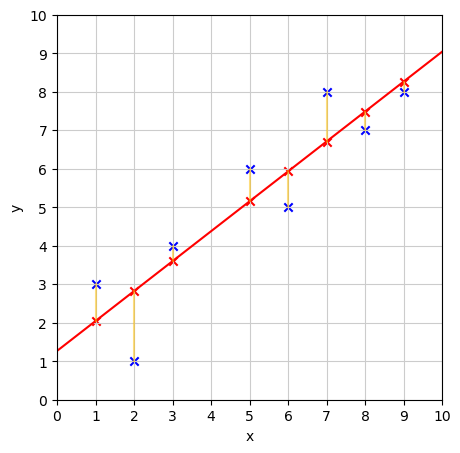

In [30]:
fig, ax = plt.subplots(figsize=(5,5))

# 绘制样本数据
ax.scatter(x, y, marker = 'x', color = 'b')

# 绘制回归直线
ax.plot(x_array, y_array_pred, color='r')

# 绘制预测值
ax.scatter(x, y_pred, marker = 'x', color='r')

# 绘制误差
ax.plot(([i for i in x.squeeze()], [i for i in x.squeeze()]),
        ([j for j in y_pred.squeeze()], [j for j in y.squeeze()]),
         c='#FFC000', alpha = 0.5)

# 装饰
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.grid(True, c = '0.8')
ax.set_aspect('equal', 'box')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  